In [2]:
## import all the required packages 
import numpy as np, pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection  import train_test_split 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics


In [92]:
df = pd.read_csv(r'C:\Users\nidum\OneDrive\Documents\Python Scripts\Lead Scoring Assignment\Leads.csv')

## Inspecting the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
## we have 36 columns in the dataframe and9240 dataapoints . Let's check the duplicates in ID columns 
sum(df.duplicated(subset = 'Prospect ID') )==0

True

In [6]:
sum(df.duplicated(subset = 'Lead Number') )==0

True

## Data cleaning 

In [7]:
df. isnull().sum().sort_values (ascending= False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [17]:
df['Lead Quality'].value_counts()

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [93]:
## removing the unwanted columns based on null values. Dropping columns which have more than 30% null values 

df = df.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index', 'Tags'], axis =1 )

In [94]:
## after dropping the null columns , we have 30 columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [21]:
## checking the value counts of all columns to identify the columns which have select values 
for c in df:
    print(df[c].value_counts())
    print ('**************next column****************')
    
    

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
**************next column****************
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64
**************next column****************
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
**************next c

In [95]:
##  Specialization, how did you hear about X education, lead profile ,city  have select values . replace select values with 'User not provided'
df= df.replace ('Select','User has not provided')

In [11]:
## checking few columns if replacement has worked or not 

df['Lead Profile'].value_counts()

Lead Profile
User has not provided          4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [12]:
df['City'].value_counts()

City
Mumbai                         3222
User has not provided          2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [96]:
## dropping  columns as they have data imbalance 
df = df.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis =1)

In [32]:
df.shape

(9240, 19)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [15]:
## check the value_counts again 

for c in df:
    print(df[c].value_counts())

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search

In [97]:
## dropping one more column with data imbalalnce
df = df.drop(['What matters most to you in choosing a course'],axis =1 )

In [98]:
df = df.drop(['Lead Profile','How did you hear about X Education'],axis =1 )

In [99]:
df = df.drop(['Country'],axis =1 )

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9204 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9137 non-null   object 
 10  Specialization                          7802 non-null   obje

### EDA Analysis 

In [54]:
## find out the columns which are not required 
#cf = ["City","Lead Origin","Do Not Email"]
#fig,ax = plt.subplots(1,len(cf))
#for i , cf in  enumerate(df[cf]):
 #   df[cf].value_counts().plot(kind = 'bar', ax = ax[i])
    


In [101]:
 df.drop(['Lead Number','Prospect ID'], axis =1 , inplace = True)

In [102]:
 df.drop(['City'], axis =1 , inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          7802 non-null   object 
 9   What is your current occupation         6550 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [103]:
df['Converted']= df['Converted'].astype(str)

In [24]:
## elts' check the null values again 
df.isnull().sum().sort_values(ascending= False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [104]:
df = df[~pd.isnull(df['What is your current occupation'])]

In [26]:
## lets check the null values again 
df.isnull().sum().sort_values(ascending= False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [105]:
df = df[~pd.isnull(df['TotalVisits'])]

In [28]:
## lets check the null values again 
df.isnull().sum().sort_values(ascending= False)

Lead Source                               29
Specialization                            18
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [106]:
df = df[~pd.isnull(df['Lead Source'])]

In [30]:
## lets check the null values again 
df.isnull().sum().sort_values(ascending= False)

Specialization                            18
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [107]:
df = df[~pd.isnull(df['Specialization'])]

In [32]:
## lets check the null values again 
df.isnull().sum().sort_values(ascending= False)

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

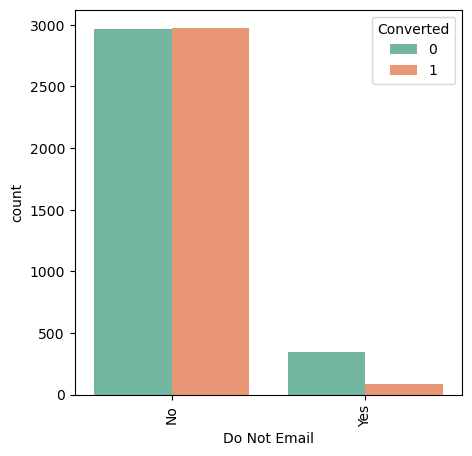

In [35]:
## categorical variable anlaysis against converted column (bi-variant analysis)
plt.figure(figsize = (5,5))
sns.countplot(x ='Do Not Email', hue = 'Converted', data = df, palette = 'Set2')
plt.xticks(rotation =90)
#ax.set_xticklabels (ax.get_xticklabels(), rotation =90)
plt.show()
    

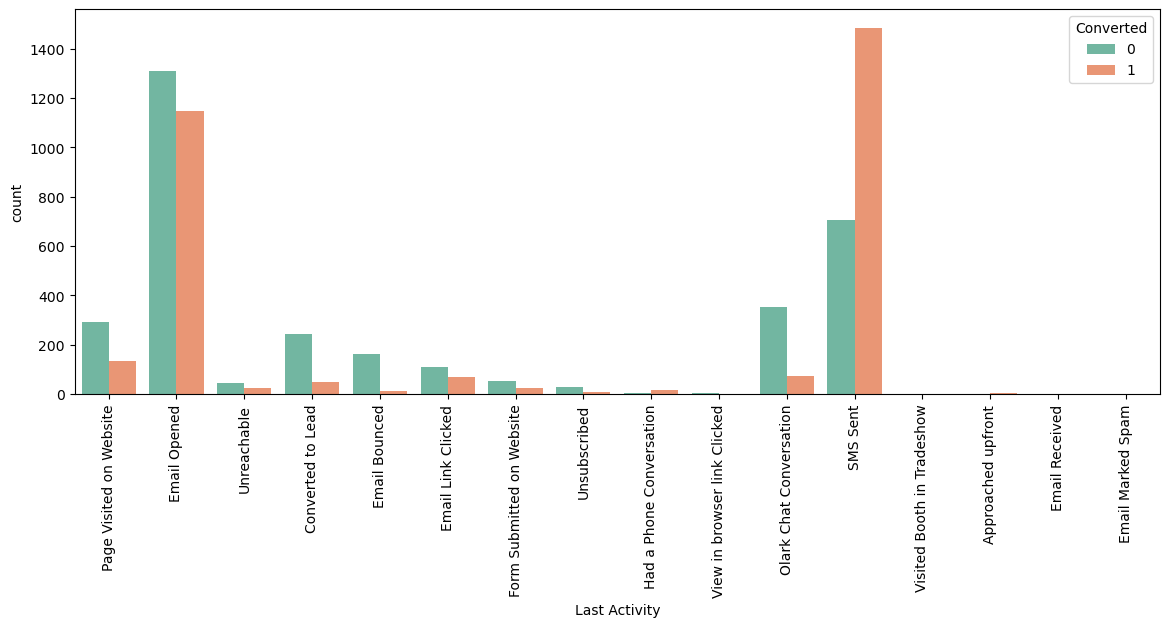

In [36]:
plt.figure(figsize = (14,5))
sns.countplot(x ='Last Activity', hue = 'Converted', data = df, palette = 'Set2')
plt.xticks(rotation =90)
#ax.set_xticklabels (ax.get_xticklabels(), rotation =90)
plt.show()

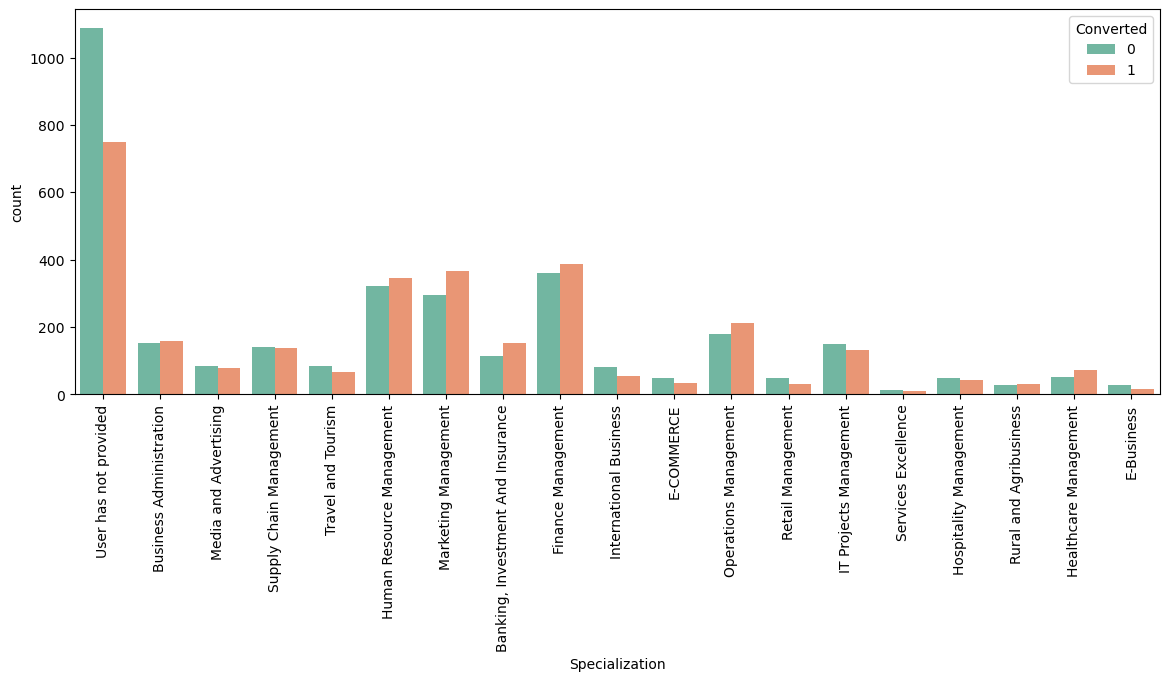

In [239]:
plt.figure(figsize = (14,5))
sns.countplot(x ='Specialization', hue = 'Converted', data = df, palette = 'Set2')
plt.xticks(rotation =90)
#ax.set_xticklabels (ax.get_xticklabels(), rotation =90)
plt.show()

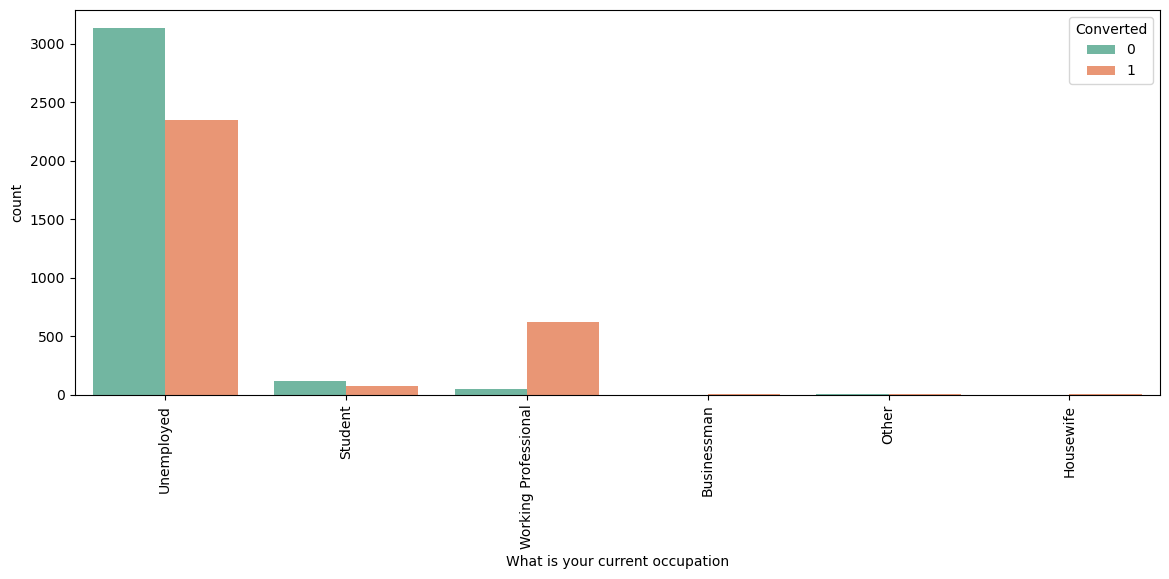

In [37]:
plt.figure(figsize = (14,5))
sns.countplot(x ='What is your current occupation', hue = 'Converted', data = df, palette = 'Set2')
plt.xticks(rotation =90)
#ax.set_xticklabels (ax.get_xticklabels(), rotation =90)
plt.show()

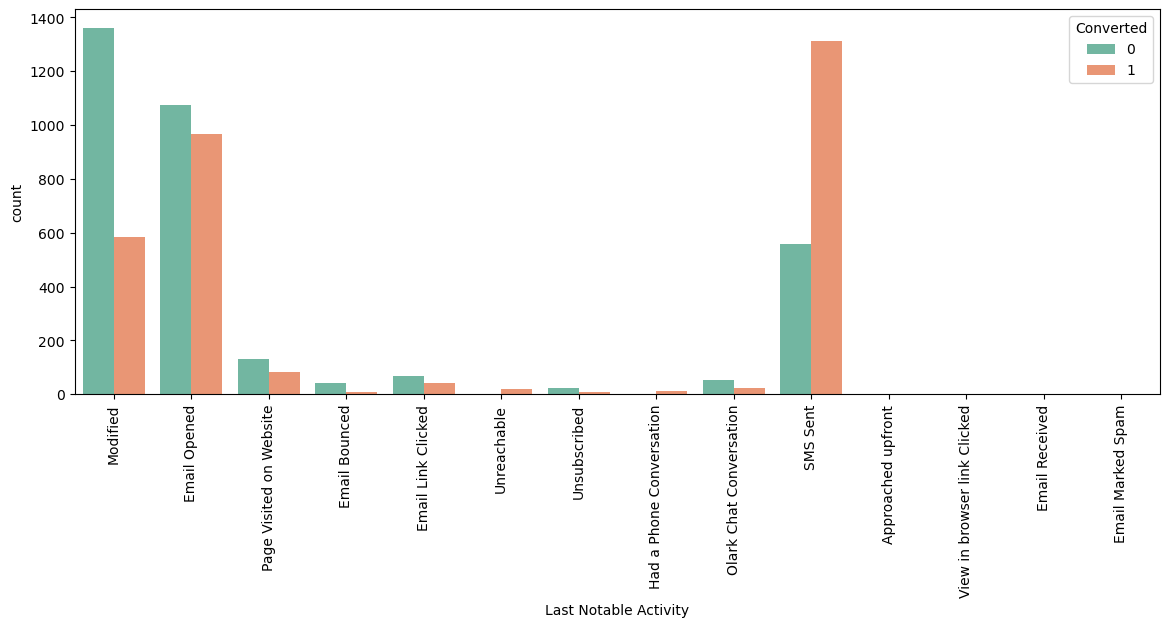

In [38]:
plt.figure(figsize = (14,5))
sns.countplot(x ='Last Notable Activity', hue = 'Converted', data = df, palette = 'Set2')
plt.xticks(rotation =90)
#ax.set_xticklabels (ax.get_xticklabels(), rotation =90)
plt.show()

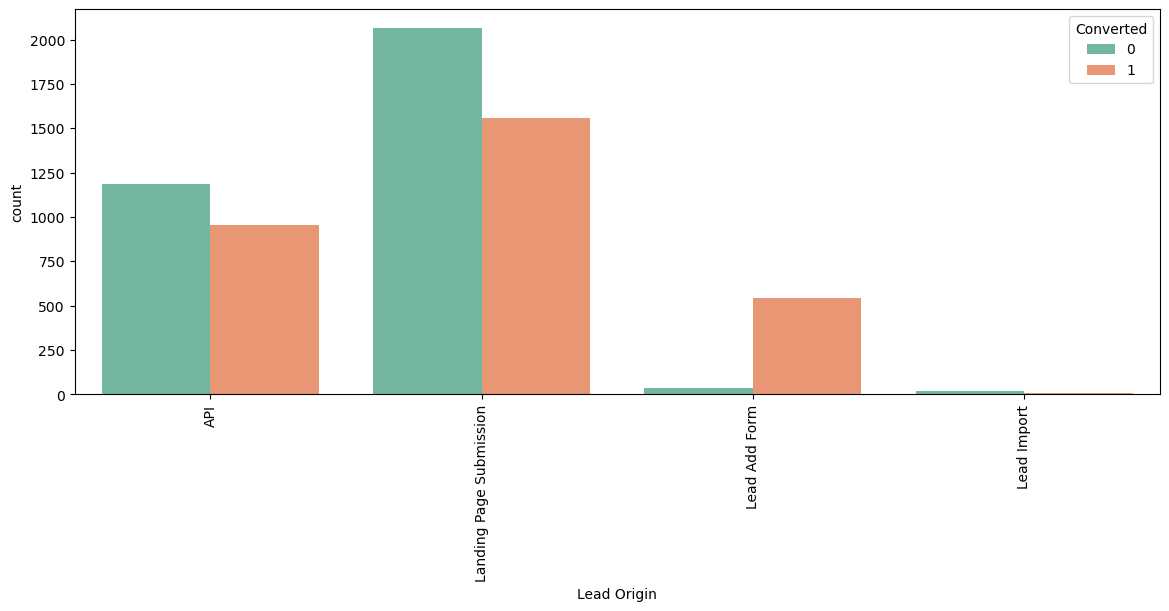

In [46]:
plt.figure(figsize = (14,5))
sns.countplot(x ='Lead Origin', hue = 'Converted', data = df, palette = 'Set2')
plt.xticks(rotation =90)
#ax.set_xticklabels (ax.get_xticklabels(), rotation =90)
plt.show()

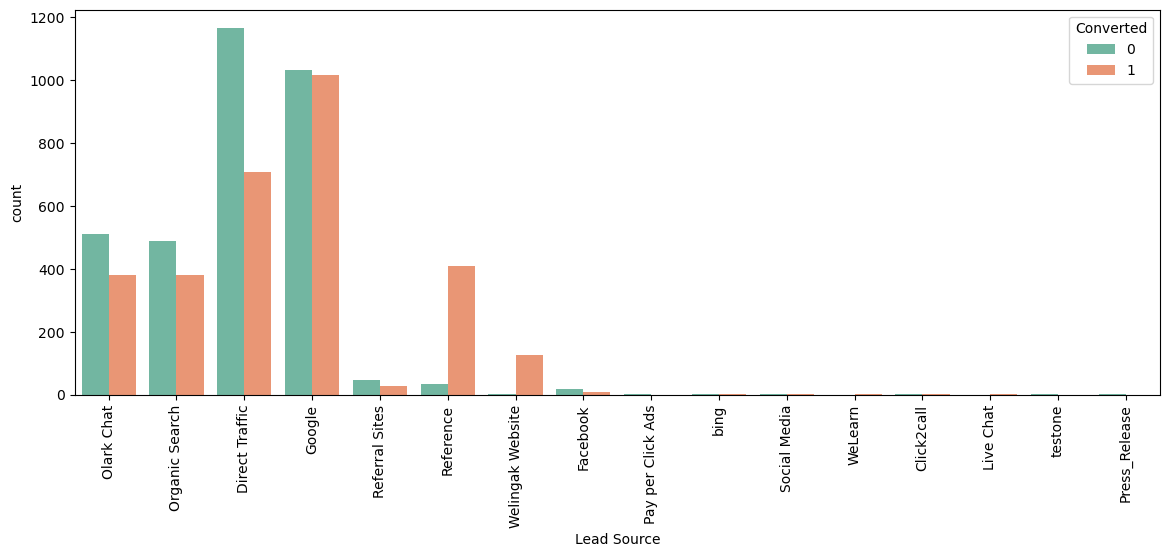

In [47]:
plt.figure(figsize = (14,5))
sns.countplot(x ='Lead Source', hue = 'Converted', data = df, palette = 'Set2')
plt.xticks(rotation =90)
#ax.set_xticklabels (ax.get_xticklabels(), rotation =90)
plt.show()

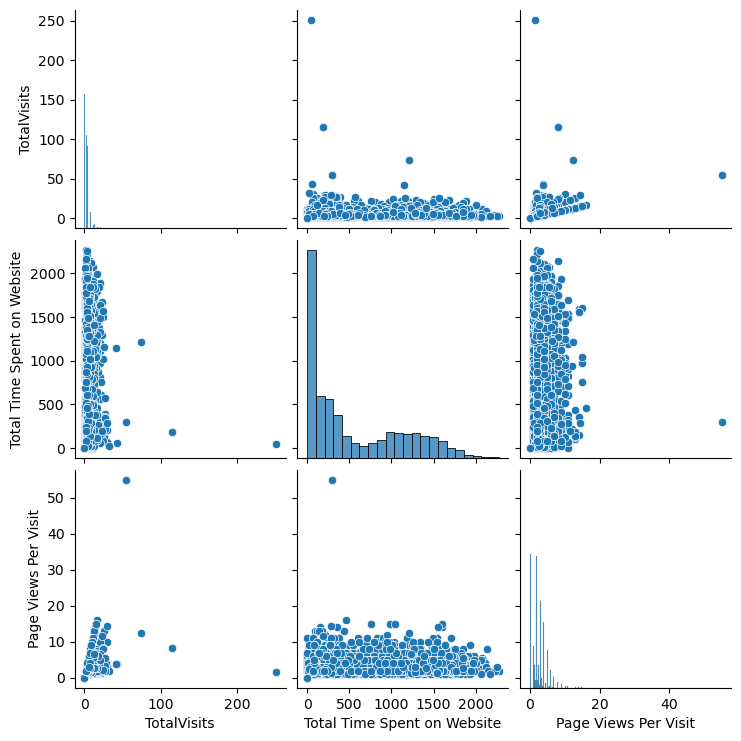

In [39]:
#num = df[['TotalVisits','Total Time Spent on Website']]
sns.pairplot(df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

<Axes: >

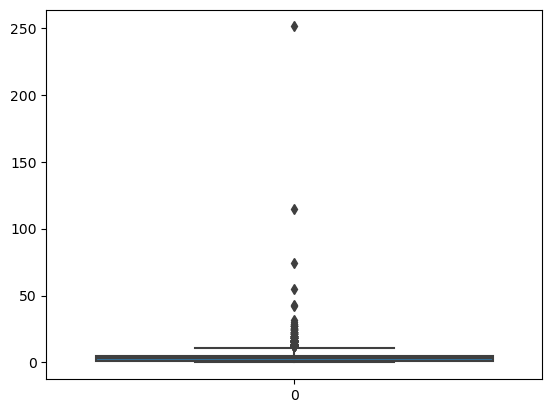

In [42]:
sns.boxplot(df['TotalVisits'])

<Axes: >

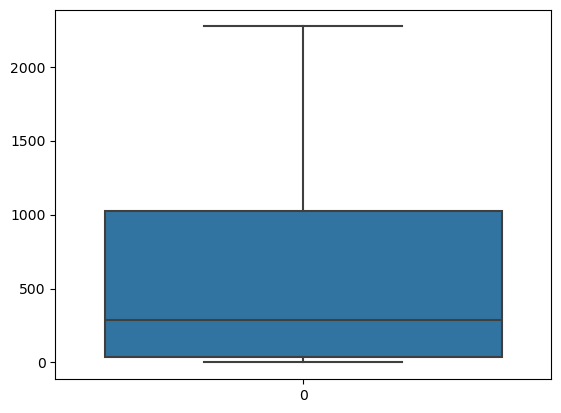

In [44]:
sns.boxplot(df['Total Time Spent on Website'])

<Axes: >

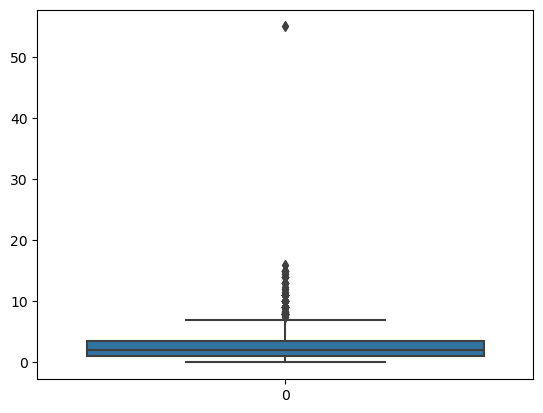

In [45]:
sns.boxplot(df['Page Views Per Visit'])

In [ ]:
## no Major outliers detected hence proceeding for dummy variable creation

<Axes: >

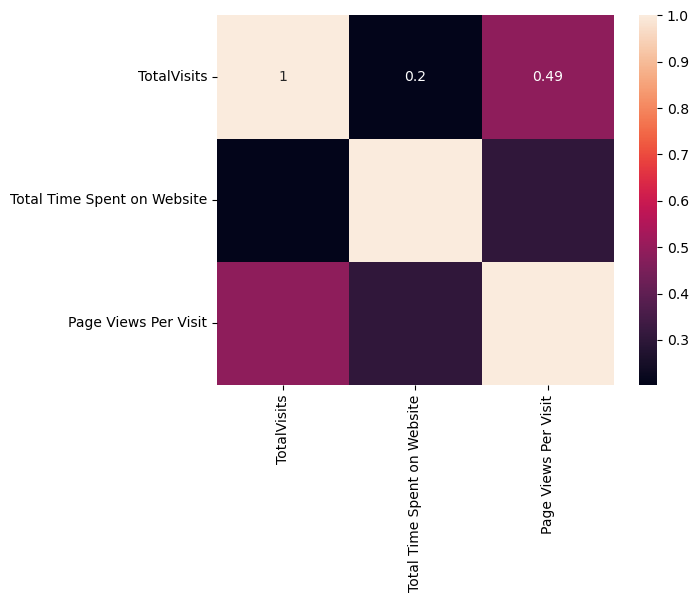

In [53]:
sns.heatmap(df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr(),annot = True)

In [108]:
## Dummy variable creation for categorical variables 
dummy_var1 = df[['Lead Origin','Lead Source','Do Not Email','Last Activity','What is your current occupation','A free copy of Mastering The Interview','Last Notable Activity']]


In [109]:
dummy_var1 = pd.get_dummies(dummy_var1, drop_first = True,dtype= int)

In [110]:
df = pd.concat ([dummy_var1,df],axis =1 )

In [111]:
df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,...,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,0,0,0,0,0,0,0,1,0,0,...,No,0,0.0,0,0.0,Page Visited on Website,User has not provided,Unemployed,No,Modified
1,0,0,0,0,0,0,0,0,1,0,...,No,0,5.0,674,2.5,Email Opened,User has not provided,Unemployed,No,Email Opened
2,1,0,0,1,0,0,0,0,0,0,...,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,1,0,0,1,0,0,0,0,0,0,...,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,1,0,0,0,0,1,0,0,0,0,...,No,1,2.0,1428,1.0,Converted to Lead,User has not provided,Unemployed,No,Modified


In [112]:
dummy_spcl = df['Specialization']


In [113]:
dummy_spcl = pd.get_dummies(dummy_spcl, drop_first = True,dtype= int)

In [114]:
dummy_spcl= dummy_spcl.drop('User has not provided',axis =1 )

In [115]:
dummy_spcl.head()

,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [116]:
df = pd.concat([df,dummy_spcl],axis =1)

In [117]:
df.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_testone', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last A

In [118]:
df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,...,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
## dropping original columns which have dummy values 
df = df.drop(['Specialization','Lead Origin','Lead Source','Do Not Email','Last Activity','What is your current occupation','A free copy of Mastering The Interview','Last Notable Activity'],axis =1)


In [120]:
df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,...,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train test split

In [121]:
X = df.drop(['Converted'],axis=1)

In [122]:
X.shape

(6373, 73)

In [123]:
y= df['Converted']
y.shape

(6373,)

In [124]:
X_train, X_test,y_train,y_test = train_test_split(X,y, train_size =0.7, test_size =0.3, random_state =100)

In [125]:
X_train.shape

(4461, 73)

In [126]:
X_test.shape

(1912, 73)

In [127]:
## import minmax scaler 
from sklearn.preprocessing import MinMaxScaler 
scaler= MinMaxScaler()

In [128]:
X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']]= scaler.fit_transform(X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])

In [129]:
## verifying whether scaling done properly or not 
X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']].head()

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
8003,0.015936,0.125,0.029489
218,0.015936,0.250,0.082306
4171,0.023904,0.375,0.034331
4037,0.000000,0.000,0.000000
3660,0.000000,0.000,0.000000


## Step 2 : Model Building

In [147]:
## initiating the logistic regression model
logreg2 = LogisticRegression()

In [149]:
## take the top 15 varaibles using RFE approach 
rfe = RFE(logreg2,n_features_to_select=15)             # running RFE with 15 variables as output
#rfe = rfe.fit(X_train, y_train)

In [150]:
rfe = rfe.fit(X_train, y_train)

In [151]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Direct Traffic', False, 7),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 9),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 5),
 ('Last Activity_Page Visited on Website', False, 11),
 ('Last Activity_SMS Sent', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Last Notable Activity_Email Bounced', False, 3),
 ('Last Notable Activity_Email Link Clicked', False, 8),
 ('Last Notable Activity_Email Opened', False, 12),
 ('Last Notable Acti

In [152]:
## picking up the top 15 columns 
col = X_train.columns[rfe.support_]

In [153]:
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable', 'TotalVisits',
       'Total Time Spent on Website'],
      dtype='object')

In [154]:
## not selected columns
X_train.columns[~rfe.support_]

Index(['Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Page Views Per Visit', 'E-Business', 'E-COMMERCE',
       'Finance Management', 'Healthcare Management',
       'Human Resource Management', 'IT Projects Management',
       'Marketing Management', 'Rural and Agribusiness',
       'Supply Chain Management', 'Travel and Tourism'],
      dtype='object')

### Model Building

In [155]:
X_train = X_train[col]
X_train_sm = sm.add_constant(X_train)



In [156]:
#logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())




logm1 = sm.GLM(y_train.astype(float),X_train_sm.astype(float), family = sm.families.Binomial())

In [157]:
res= logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Tue, 21 May 2024   Deviance:                       4145.5
Time:                        15:12:20   Pearson chi2:                 4.84e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
========================================================================================================================
"""

In [158]:
## seems like p-value is higher .let's check the VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Origin_Lead Add Form,84.19
2,Lead Source_Reference,65.18
3,Lead Source_Welingak Website,20.03
9,What is your current occupation_Unemployed,3.65
5,Last Activity_Had a Phone Conversation,2.44
11,Last Notable Activity_Had a Phone Conversation,2.43
14,Total Time Spent on Website,2.38
13,TotalVisits,1.62
6,Last Activity_SMS Sent,1.59
10,What is your current occupation_Working Profes...,1.56


In [159]:
## let's drop lead_source_reference column as it has high vif and p-value 
X_train_sm.drop('Lead Source_Reference', axis = 1, inplace = True)

In [160]:
## model 2 

logm1 = sm.GLM(y_train.astype(float),X_train_sm.astype(float), family = sm.families.Binomial())
res= logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Tue, 21 May 2024   Deviance:                       4146.5
Time:                        15:13:05   Pearson chi2:                 4.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3658
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
========================================================================================================================
"""

In [161]:
## check the VIF for model 2 
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,268.28
9,What is your current occupation_Unemployed,31.55
10,What is your current occupation_Working Profes...,25.46
8,What is your current occupation_Student,8.39
5,Last Activity_Had a Phone Conversation,2.43
11,Last Notable Activity_Had a Phone Conversation,2.43
1,Lead Origin_Lead Add Form,1.55
7,What is your current occupation_Housewife,1.47
3,Lead Source_Welingak Website,1.30
14,Total Time Spent on Website,1.27


In [162]:
##  Let's drop Last Notable Activity_Had a Phone Conversation	  as it has high p-value 
X_train_sm.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

### Model 3

In [163]:

logm1 = sm.GLM(y_train.astype(float),X_train_sm.astype(float), family = sm.families.Binomial())
res= logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Tue, 21 May 2024   Deviance:                       4152.2
Time:                        15:13:40   Pearson chi2:                 4.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3650
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
========================================================================================================================
"""

In [164]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,268.28
9,What is your current occupation_Unemployed,31.55
10,What is your current occupation_Working Profes...,25.46
8,What is your current occupation_Student,8.39
1,Lead Origin_Lead Add Form,1.55
7,What is your current occupation_Housewife,1.47
3,Lead Source_Welingak Website,1.30
13,Total Time Spent on Website,1.27
2,Lead Source_Olark Chat,1.24
12,TotalVisits,1.13


In [165]:
## vif seems to be in decent range so let's drop What is your current occupation_Housewife as it has high p-value 
X_train_sm.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

### Model 4

In [166]:
logm1 = sm.GLM(y_train.astype(float),X_train_sm.astype(float), family = sm.families.Binomial())
res= logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Tue, 21 May 2024   Deviance:                       4156.7
Time:                        15:13:57   Pearson chi2:                 4.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3644
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
========================================================================================================================
"""

In [167]:
## checking the VIF 
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,183.29
8,What is your current occupation_Unemployed,21.50
9,What is your current occupation_Working Profes...,17.60
7,What is your current occupation_Student,6.02
1,Lead Origin_Lead Add Form,1.55
3,Lead Source_Welingak Website,1.30
12,Total Time Spent on Website,1.27
2,Lead Source_Olark Chat,1.24
11,TotalVisits,1.13
6,Last Activity_SMS Sent,1.05


### Model 5 

In [168]:
## let's drop What is your current occupation_Working Professional as it has high p value among all variables 
X_train_sm.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [169]:
logm1 = sm.GLM(y_train.astype(float),X_train_sm.astype(float), family = sm.families.Binomial())
res= logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Tue, 21 May 2024   Deviance:                       4158.1
Time:                        15:14:09   Pearson chi2:                 4.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3642
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
==============================================================================================================
"""

In [170]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.54
1,Lead Origin_Lead Add Form,1.55
8,What is your current occupation_Unemployed,1.33
3,Lead Source_Welingak Website,1.30
11,Total Time Spent on Website,1.27
7,What is your current occupation_Student,1.26
2,Lead Source_Olark Chat,1.24
10,TotalVisits,1.12
6,Last Activity_SMS Sent,1.05
4,Do Not Email_Yes,1.01


In [ ]:
## both p-value and vif seem to be decent so proceed for model evaluation 

## Model Evaluation 

In [171]:
y_train_pred= res.predict(X_train_sm)

In [172]:
y_train_pred

8003    0.300117
218     0.142002
4171    0.127629
4037    0.291558
3660    0.954795
          ...   
8759    0.954795
100     0.759334
5877    0.909280
8658    0.208249
8217    0.370186
Length: 4461, dtype: float64

In [173]:
## we need to reshape or else it will throw error 
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.30011695, 0.14200165, 0.12762885, ..., 0.90928046, 0.20824893,
       0.37018595])

In [174]:
## create dataframe with conversion probabilities 
y_train_pred_prob = pd.DataFrame({'Converted': y_train.values, 'Conversion_probability' : y_train_pred}) 

#y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_prob.head()


,Converted,Conversion_probability
0,0,0.300117
1,0,0.142002
2,1,0.127629
3,1,0.291558
4,1,0.954795


In [175]:
## let's take arbitary cut_off as 0.5 to  seggregate the rows 
y_train_pred_prob['Predicted']= y_train_pred_prob.Conversion_probability.map(lambda x: 1 if x > 0.5 else 0)


y_train_pred_prob.head()

,Converted,Conversion_probability,Predicted
0,0,0.300117,0
1,0,0.142002,0
2,1,0.127629,0
3,1,0.291558,0
4,1,0.954795,1


In [176]:
y_train_pred_prob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4461 entries, 0 to 4460
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Converted               4461 non-null   object 
 1   Conversion_probability  4461 non-null   float64
 2   Predicted               4461 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 104.7+ KB


## Evaluation using metrics 

In [177]:
y_train_pred_prob['Predicted']= y_train_pred_prob['Predicted'].astype(str)

In [178]:
# Confusion matrix 
cf = metrics.confusion_matrix(y_train_pred_prob.Converted, y_train_pred_prob.Predicted )
print(cf)

[[1929  383]
 [ 560 1589]]


In [179]:
## accuracy 
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_prob.Converted, y_train_pred_prob.Predicted))

0.7886124187401928


In [180]:
# Let's evaluate the other metrics as well

TP = cf[1,1] # true positive 
TN = cf[0,0] # true negatives
FP = cf[0,1] # false positives
FN = cf[1,0] # false negatives

In [181]:
sensitivity = TP/(TP+FN)


In [182]:
sensitivity

0.739413680781759

In [183]:
specificity = TN/(TN+FP)

In [184]:
specificity

0.8343425605536332

In [185]:
precision =  TP/(TP+FP)
precision

0.8057809330628803

In [186]:
recall  =  TP/(TP+FN)
recall 

0.739413680781759

 ### Train set metrics 
#### accuracy = 78%
#### precision = 80%
#### recall = 73%

## Make predictions on the test set 

In [187]:
## scaling the test set numerical variables
X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']]= scaler.fit_transform(X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])

In [188]:
## verifying if scaling done or not properly
X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']].head()

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
4771,0.000000,0.000000,0.000000
6122,0.094595,0.127273,0.029294
9202,0.054054,0.072727,0.420328
6570,0.040541,0.054545,0.382157
2668,0.108108,0.072727,0.398580


In [189]:
## lets see the test set columns 
X_test.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_testone', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last A

In [190]:
## columns selected by RFE model 

col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable', 'TotalVisits',
       'Total Time Spent on Website'],
      dtype='object')

In [191]:
X_test= X_test[col]

In [192]:
X_test_sm = sm.add_constant(X_test)

In [193]:
X_test_sm.columns

Index(['const', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable', 'TotalVisits',
       'Total Time Spent on Website'],
      dtype='object')

In [194]:

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 
                     'Last Notable Activity_Had a Phone Conversation'], axis =1 , inplace = True)

In [195]:
y_test_pred = res.predict(sm.add_constant(X_test))

In [196]:
y_test_pred.head()

4771    0.996296
6122    0.239351
9202    0.786950
6570    0.373668
2668    0.859736
dtype: float64

In [197]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [198]:
y_pred_1.head()

,0
4771,0.996296
6122,0.239351
9202,0.786950
6570,0.373668
2668,0.859736


In [199]:
y_test_df = pd.DataFrame(y_test)

In [200]:
y_test_df.head()

,Converted
4771,1
6122,0
9202,0
6570,1
2668,1


In [201]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [202]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [203]:
y_pred_final.head()

,Converted,0
0,1,0.996296
1,0,0.239351
2,0,0.786950
3,1,0.373668
4,1,0.859736


In [204]:
## rename the column to proper name 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Probability'})

In [205]:
y_pred_final.head()

,Converted,Conversion_Probability
0,1,0.996296
1,0,0.239351
2,0,0.786950
3,1,0.373668
4,1,0.859736


In [206]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)

In [207]:
y_pred_final.head()

,Converted,Conversion_Probability,final_predicted
0,1,0.996296,1
1,0,0.239351,0
2,0,0.786950,1
3,1,0.373668,0
4,1,0.859736,1


In [208]:
y_pred_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1912 entries, 0 to 1911
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Converted               1912 non-null   object 
 1   Conversion_Probability  1912 non-null   float64
 2   final_predicted         1912 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 44.9+ KB


In [209]:
y_pred_final['final_predicted']=y_pred_final['final_predicted'].astype(str)

In [210]:
## accuracy 

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.770397489539749

In [211]:
# Confusion matrix 
cf_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(cf_test)

[[741 255]
 [184 732]]


In [212]:
## # Let's evaluate the other metrics as well

TP = cf_test[1,1] # true positive 
TN = cf_test[0,0] # true negatives
FP = cf_test[0,1] # false positives
FN = cf_test[1,0] # false negatives

In [213]:
sensitivity_test= TP/(TP+FN)
sensitivity_test

0.7991266375545851

In [214]:
specificity_test = TN/(TN+FP)
specificity_test

0.7439759036144579

In [215]:
## precision and recall 
precision =  TP/(TP+FP)
precision

0.7416413373860182

In [217]:
## recal 
recall = TP/(TP+FN)
recall 

0.7991266375545851

 ### Test set metrics 
#### accuracy = 77%
#### precision = 74%
#### recall = 80%